# xi. Model Inference

Setelah melakukan pembuatan model dan menemukan model terbaik, kita juga telah melakukan pengujian terhadap data test. Pada bagian ini akan dilakukan percobaan model terhadap data baru. Tujuan dari tahapan ini adalah untuk melihat apakah model mampu memprediksi suatu objek pada gambar baru dengan tepat atau tidak.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16, preprocess_input


In [2]:
# Muat model yang telah disimpan
model_tl = load_model('model_tl.h5')

In [3]:
class_name = ['bikes', 'cars']

# Define the prediction function
def prediction(file):
    img = tf.keras.utils.load_img(file, target_size=(224, 224))
    x = tf.keras.utils.img_to_array(img)

    # Apply preprocessing
    x = preprocess_input(x)

    # Expand dimensions to match the input shape (1, img_height, img_width, 3)
    x = np.expand_dims(x, axis=0)

    # Predict probability
    y_pred_proba = model_tl.predict(x)

    # Determine the class based on threshold (0.5 for binary classification)
    y_pred_class = (y_pred_proba[0] > 0.5).astype("int32")

    # Get the predicted class name
    y_pred_class_name = class_name[y_pred_class[0]]

    # Display image and prediction
    plt.imshow(tf.keras.utils.load_img(file))
    plt.axis('off')
    plt.title(f'Prediction: {y_pred_class_name}')
    plt.show()

    print('Prediction : {}'.format(y_pred_class_name))


<>:1: SyntaxWarning: invalid escape sequence '\H'
<>:1: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Serina Roihaanah\AppData\Local\Temp\ipykernel_33476\4282134279.py:1: SyntaxWarning: invalid escape sequence '\H'
  file_path = "D:\HACKTIV8\PHASE 2\WEEK 1\GC7\p2-ftds036-rmt-gc7-srnrhnh\Freego-red-600x600.jpg"


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step


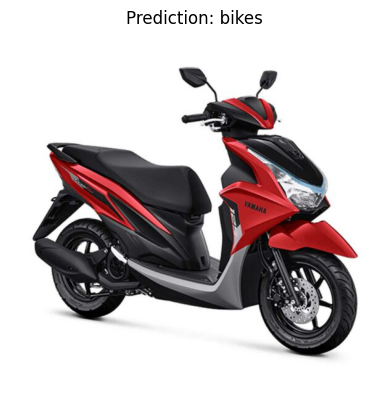

Prediction : bikes


In [5]:
file_path = "D:\HACKTIV8\PHASE 2\WEEK 1\GC7\p2-ftds036-rmt-gc7-srnrhnh\Freego-red-600x600.jpg"
prediction(file_path)

Terlihat bahwa objek pada gambar tersebut ialah mobil dengan latar belakang yang cukup memiliki banyak pewarnaan. Akan tetapi, model ini mampu memprediksi objek dengan benar.